In [1]:
	
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter

In [5]:
Aug2005='../Spectra/B049/FEROS_2005AUG/ADP.2016-09-21T09:18:13.271.fits'
Sept2005='../Spectra/B049/FEROS_2005SEP/ADP.2016-09-21T09:18:32.411.fits'
Aug2013='../Spectra/B049/FEROS_2013AUG/ADP.2016-09-27T09:50:45.369.fits'

In [6]:
#fits.getheader(B103)

In [7]:
data1=fits.getdata(Aug2005)
data2=fits.getdata(Sept2005)
data3=fits.getdata(Aug2013)
data3

FITS_rec([([3527.51999997, 3527.54999997, 3527.57999997, ..., 9216.6298728 , 9216.6598728 , 9216.6898728 ], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  7.94802152e-04,  9.79057746e-04,  1.13056763e-03], [nan, nan, nan, ..., nan, nan, nan])],
         dtype=(numpy.record, [('WAVE', '>f8', (189640,)), ('FLUX', '>f4', (189640,)), ('ERR', '>f4', (189640,))]))

In [18]:
#Data October 2015
xd1_new=data1['FLUX'][0][1000:-1000].tolist()
xd1_filt=median_filter(xd1_new,100)
lam1 = data1['WAVE'][0][1000:-1000]

mask_alpha1=np.abs(6562.8-lam1)>40
mask_beta1=np.abs(4861.33333333333-lam1)>40
mask_gamma1=np.abs(4367.23-lam1)>50 #H_gamma está corrido
mask1=mask_alpha1&mask_beta1&mask_gamma1

#Data December 2015
xd2_new=data2['FLUX'][0][1000:-1000].tolist()
xd2_filt=median_filter(xd2_new,100)
lam2 = data2['WAVE'][0][1000:-1000]

mask_alpha2=np.abs(6562.8-lam2)>40
mask_beta2=np.abs(4861.33333333333-lam2)>40
mask_gamma2=np.abs(4367.23-lam2)>50 #H_gamma está corrido
mask2=mask_alpha2&mask_beta2&mask_gamma2

#Data July 2016
xd3_new=data3['FLUX'][0][1000:-1000].tolist()
xd3_filt=median_filter(xd3_new,100)
lam3 = data3['WAVE'][0][1000:-1000]

mask_alpha3=np.abs(6562.8-lam3)>40
mask_beta3=np.abs(4861.33333333333-lam3)>40
mask_gamma3=np.abs(4367.23-lam3)>50 #H_gamma está corrido
mask3=mask_alpha3&mask_beta3&mask_gamma3

In [19]:
modelo1 = fitter(models.Chebyshev1D(25),lam1[mask1],xd1_filt[mask1])
modelo2 = fitter(models.Chebyshev1D(25),lam2[mask2],xd2_filt[mask2])
modelo3 = fitter(models.Chebyshev1D(25),lam3[mask3],xd3_filt[mask3])


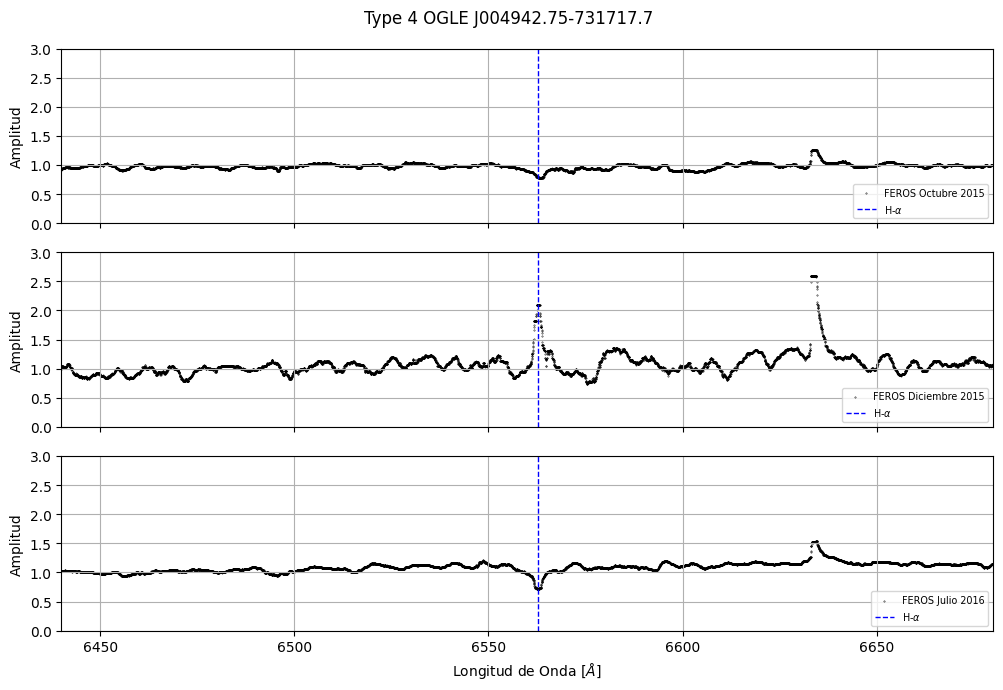

In [22]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 7))  # 5 rows, 1 column

# Plot each light curve
axs[0].scatter(lam1-3.6,xd1_filt/modelo1(lam1),s=0.1, color='black', label='FEROS Octubre 2015')
axs[1].scatter(lam2-3.6,xd2_filt/modelo2(lam2), s=0.1, color='black',label='FEROS Diciembre 2015')
axs[2].scatter(lam3-3.6,xd3_filt/modelo3(lam3), s=0.1, color='black',label='FEROS Julio 2016')



# Labels
for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.axvline(x=6562.8, color='blue', linestyle='--', linewidth=1,label=r'H-$\alpha$')
    ax.legend(loc='lower right', fontsize='x-small')
    ax.grid(True)
axs[-1].set_xlabel(r'Longitud de Onda [$\AA$]')
axs[-1].set_xlim(6440, 6680)
axs[0].set_ylim(0, 3)
axs[1].set_ylim(0, 3)
axs[2].set_ylim(0,3)

fig.suptitle('Type 4 OGLE J004942.75-731717.7')
plt.tight_layout()
plt.savefig('B103')
plt.show()

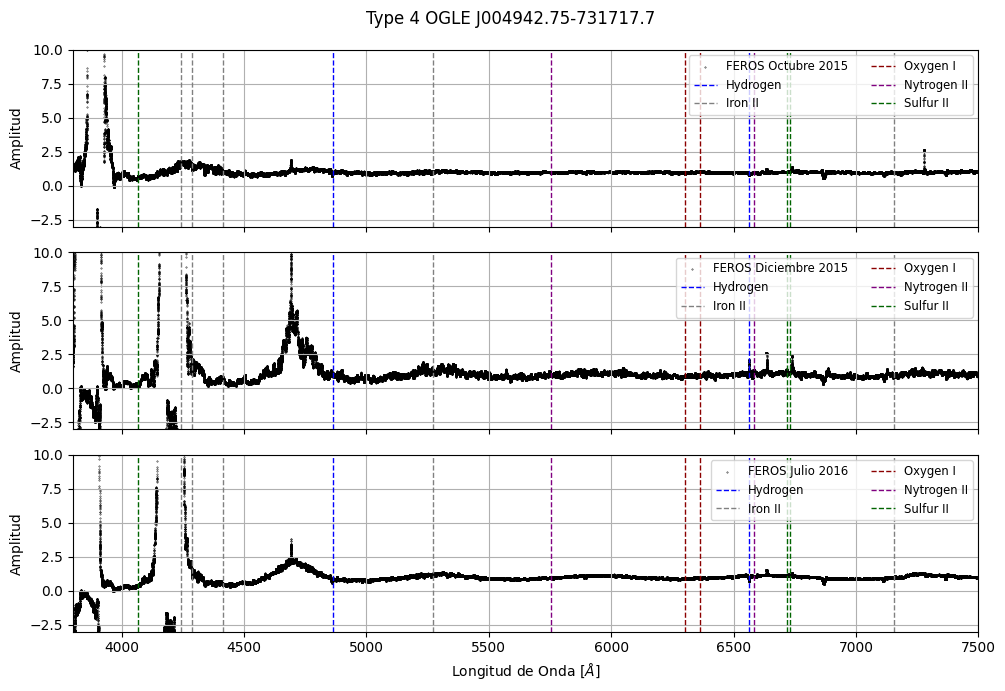

In [38]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 7))  # 5 rows, 1 column

# Plot each light curve
axs[0].scatter(lam1-3.6,xd1_filt/modelo1(lam1),s=0.1, color='black', label='FEROS Octubre 2015')
axs[1].scatter(lam2-3.6,xd2_filt/modelo2(lam2), s=0.1, color='black',label='FEROS Diciembre 2015')
axs[2].scatter(lam3-3.6,xd3_filt/modelo3(lam3), s=0.1, color='black',label='FEROS Julio 2016')



# Labels
for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.axvline(x=6562.8, color='blue', linestyle='--', linewidth=1,label=r'Hydrogen')
    ax.axvline(x=4861.3, color='blue', linestyle='--', linewidth=1)
    ax.axvline(x=7155, color='gray', linestyle='--', linewidth=1,label=r'Iron II')
    ax.axvline(x=4244, color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=4287, color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=4415, color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=5273, color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=6300, color='darkred', linestyle='--', linewidth=1,label=r'Oxygen I')
    ax.axvline(x=6363, color='darkred', linestyle='--', linewidth=1)
    ax.axvline(x=5755, color='purple', linestyle='--', linewidth=1,label=r'Nytrogen II')
    ax.axvline(x=6584, color='purple', linestyle='--', linewidth=1)
    ax.axvline(x=4068, color='darkgreen', linestyle='--', linewidth=1,label=r'Sulfur II')
    ax.axvline(x=6717, color='darkgreen', linestyle='--', linewidth=1)
    ax.axvline(x=6730, color='darkgreen', linestyle='--', linewidth=1)
    ax.legend(loc='upper right', fontsize='small',ncol=2)
    ax.grid(True)
axs[-1].set_xlabel(r'Longitud de Onda [$\AA$]')
axs[-1].set_xlim(3800, 7500)
axs[0].set_ylim(-3, 10)
axs[1].set_ylim(-3, 10)
axs[2].set_ylim(-3,10)

fig.suptitle('Type 4 OGLE J004942.75-731717.7')
plt.tight_layout()
plt.savefig('B103_full')
plt.show()